# *project: music genre classification*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*importing the necessary libraries for traing our dataset*

In [ ]:
import numpy as np
import pandas as pd
import wave
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

## *plotting data*

*plotting the given data in a graph and spectrogram*

In [ ]:
classes = {'pop':0, 'blues':1, 'hiphop':2, 'classical':3, 'disco':4, 'metal':5, 'country':6, 'blues':7, 'reggae':8, 'jazz':9, 'rock':10}

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/pop/pop.00005.wav


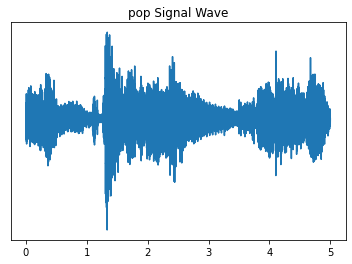

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/blues/blues.00005.wav


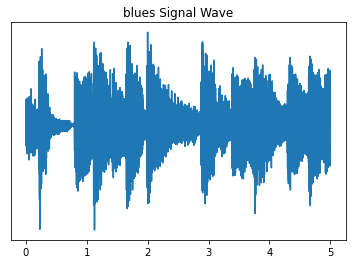

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/hiphop/hiphop.00005.wav


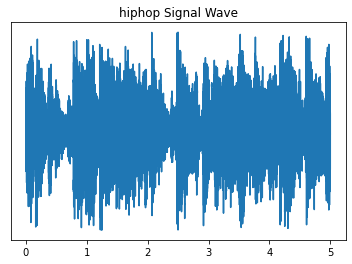

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/classical/classical.00005.wav


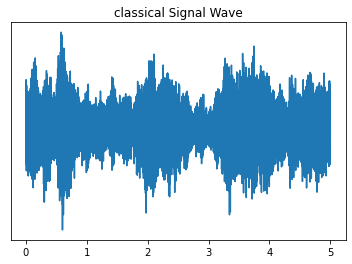

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/disco/disco.00005.wav


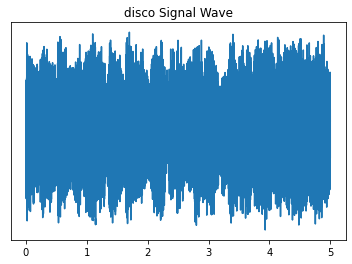

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/metal/metal.00005.wav


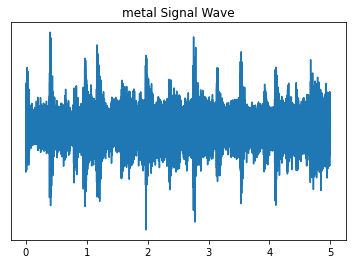

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/country/country.00005.wav


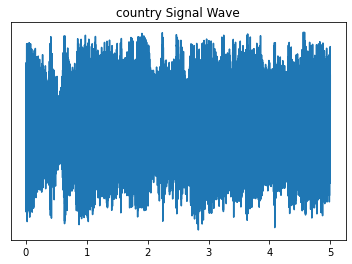

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/reggae/reggae.00005.wav


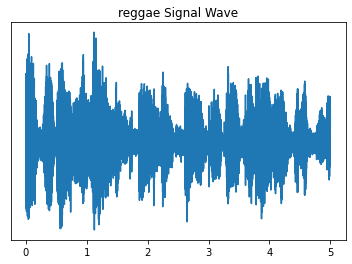

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/jazz/jazz.00005.wav


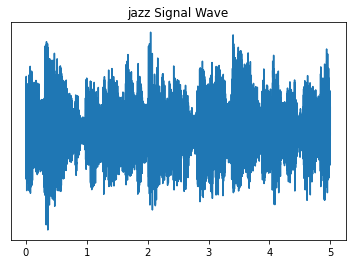

/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/rock/rock.00005.wav


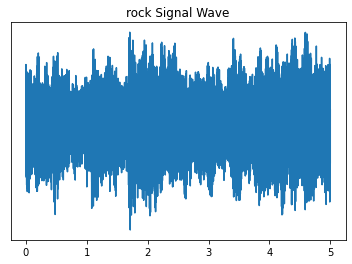

In [ ]:
for cls in classes:
    print("/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/"+cls+'/'+cls+'.00005.wav')
    y,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/"+cls+'/'+cls+'.00005.wav',duration=5.0,sr=None)
    time=np.linspace(0,len(y)/sr,num=len(y))
    plt.figure(classes[cls]+1)
    plt.title(cls+" Signal Wave")
    plt.yticks(ticks=[])
    plt.plot(time,y)
    plt.savefig(fname=cls+'_time_domain',quality=95,dpi=200)
    plt.show()

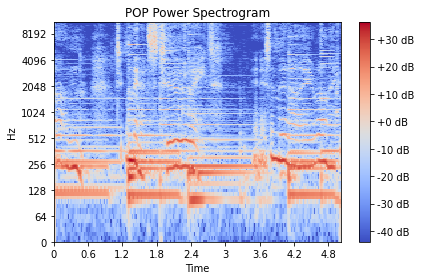

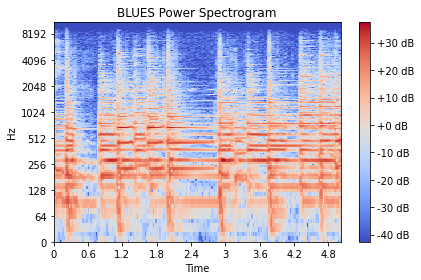

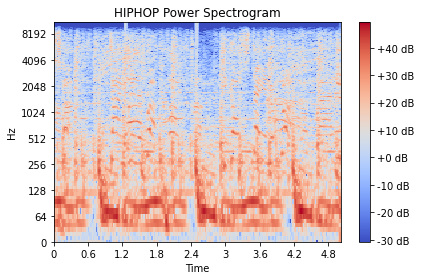

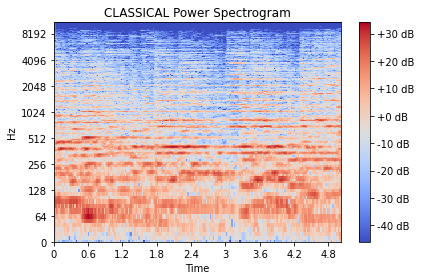

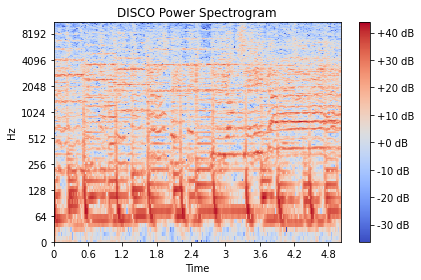

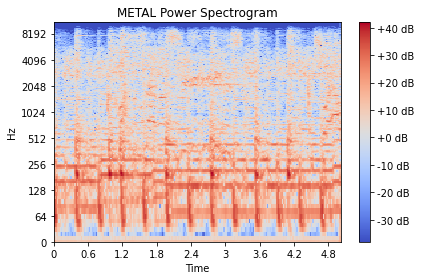

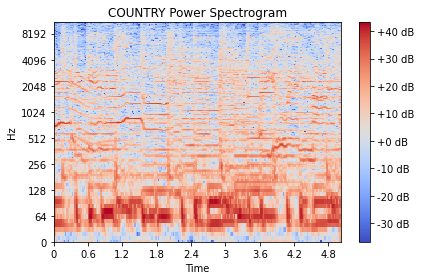

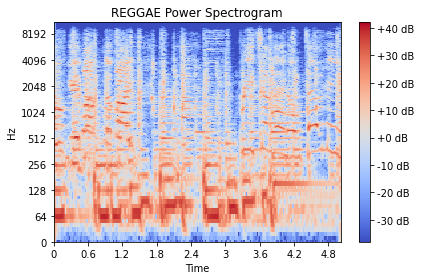

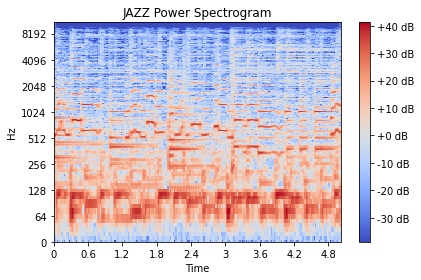

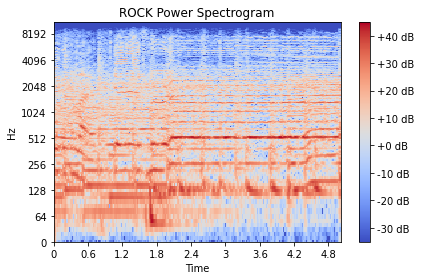

In [ ]:
for cls in classes:
    y,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/music_genre_classification/genres_original/"+cls+'/'+cls+'.00005.wav',duration=5.0,sr=None)
    librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y)),ref=1.0),y_axis='log', x_axis='time')
    plt.title(cls.upper()+" Power Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(fname=cls+'_power_spectrogram',quality=95,dpi=200)
    plt.show()

## *data extraction*

*to extract features and compile them into a dataset from the given audio files*

In [ ]:
audiofile_given= ('/content/drive/MyDrive/Music_data/genres_original/rock/rock.00000.wav')

In [ ]:
y, sr = librosa.load(audiofile_given)
hop_length = 512# Compute local onset autocorrelation
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

In [ ]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
        feature.chroma_stft,feature.rms,feature.spectral_centroid,
       feature.spectral_bandwidth, feature.spectral_rolloff, feature.zero_crossing_rate
       
]



#  feature.mfcc1, feature.mfcc2, feature.mfcc3, feature.mfcc4,
#        feature.mfcc5, feature.mfcc6, feature.mfcc7, feature.mfcc8, feature.mfcc9,
#        feature.mfcc10, feature.mfcc11, feature.mfcc12, feature.mfcc13,
#        feature.mfcc14, feature.mfcc15, feature.mfcc16, feature.mfcc17,
#        feature.mfcc18, feature.mfcc19, feature.mfcc20

def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feature_vector = feat_vect_i 
   return feature_vector

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
data=features_extractor(audiofile_given)

In [ ]:
data=data.tolist()

In [ ]:
header =[
 'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean',
       'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean',
       'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean',
       'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean',
       'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean'
]

In [ ]:
norm_audios_feat = []
y , sr = librosa.load(audiofile_given,sr=None)
feature_vector =get_feature_vector(y, sr)
feature_vector.append(tempo)
feature_vector=feature_vector + data
norm_audios_feat.append(feature_vector) 


dataframe_music=  pd.DataFrame(norm_audios_feat, columns = header)


In [ ]:
dataframe_music

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.387577,0.129127,1996.327664,2097.080528,4227.935352,0.089459,123.046875,-116.604362,109.250702,-23.165134,...,-10.87374,8.501457,-11.581522,2.199195,-6.184312,1.992846,-7.9548,2.088888,-2.400473,-1.545838


In [ ]:
import csv
norm_output = 'output_music_002.csv'

with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(norm_audios_feat)

## *preprocessing our dataset obtained*

In [ ]:
music_data= pd.read_csv('/content/drive/MyDrive/Music_data/features_30_sec.csv')

In [ ]:
music_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
music_data=music_data.drop(columns=["filename","length","chroma_stft_var","perceptr_var","spectral_bandwidth_var", "spectral_centroid_var", "rolloff_var", "zero_crossing_rate_var","harmony_var","rms_var","harmony_var","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var", "mfcc5_var", "mfcc6_var", "mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var","mfcc11_var","mfcc12_var","mfcc13_var","mfcc14_var", "mfcc15_var", "mfcc16_var", "mfcc17_var","mfcc18_var","mfcc19_var","mfcc20_var","harmony_mean", "perceptr_mean"],axis=1)

In [ ]:
music_data.columns

Index(['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean',
       'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean',
       'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean',
       'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean',
       'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
array = ['label']
# Encode labels in column 'species'.
music_data['label']= label_encoder.fit_transform(music_data[array])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
music_data.head()

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,0.350088,0.130228,1784.165850,2002.449060,3805.839606,0.083045,123.046875,-113.570648,121.571793,-19.168142,...,8.803792,-3.672300,5.747995,-5.162882,0.752740,-1.690215,-0.408979,-2.303523,1.221291,0
1,0.340914,0.095948,1530.176679,2039.036516,3550.522098,0.056040,67.999589,-207.501694,123.991264,8.955127,...,5.376327,-2.231760,4.220140,-6.012148,0.927998,-0.731125,0.295073,-0.283518,0.531217,0
2,0.363637,0.175570,1552.811865,1747.702312,3042.260232,0.076291,161.499023,-90.722595,140.446304,-29.093889,...,5.791199,-8.907628,-1.077000,-9.229274,2.451690,-7.729093,-1.816407,-3.439720,-2.231258,0
3,0.404785,0.141093,1070.106615,1596.412872,2184.745799,0.033309,63.024009,-199.544205,150.090897,5.662678,...,6.079319,-2.480174,-1.079305,-2.870789,0.780874,-3.319597,0.636965,-0.619121,-3.407448,0
4,0.308526,0.091529,1835.004266,1748.172116,3579.757627,0.101461,135.999178,-160.337708,126.219635,-35.587811,...,-2.813867,-6.933385,-7.552725,-9.164666,-4.520576,-5.454034,-0.916874,-4.404827,-11.703234,0


## *data splitting for training and testing*

*splitting our given dataset into testing and training dataset*

In [ ]:
music_x=music_data
music_x=music_x.drop(['label'], axis = 1)
music_y=music_data['label']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(music_x, music_y, random_state=3,test_size=0.33)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
# we must apply the scaling to the test set that we computed for the training set
test_x = scaler.transform(test_x)

In [ ]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text=  "value ={:.3f}, score={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


def plotting_graphs(x_label,y_label,v,a,t):
  fig, ax = plt.subplots()
  ax.plot(v,a)

  annot_max(v,a)
  # plt.ylim(0,t)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.show()

## *training and testing the best model*

In [ ]:
accuracy={}

*KNeighborsClassifier*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(train_x, train_y)
knn.score(test_x, test_y)*100

64.24242424242425

*RandomForestClassifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
t=rfc.score(test_x, test_y)
accuracy['R-Forest']=t

In [ ]:
t*100

66.66666666666666

*lightgbm*

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(train_x, train_y)
k=lgb_model.score(test_x, test_y)
accuracy['lightgbm']=k
k*100


67.27272727272727

*GradientBoostingClassifier*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = GradientBoostingClassifier(n_estimators=1000)
rfc.fit(train_x, train_y)
t= rfc.score(test_x, test_y)
accuracy['GradientBoosting']=t

In [ ]:
t*100

63.33333333333333

In [ ]:
accuracy

{'GradientBoosting': 0.6333333333333333,
 'R-Forest': 0.6666666666666666,
 'lightgbm': 0.6727272727272727}

*support vector machine kernel: quadratic*

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'poly', C=10).fit(train_x, train_y)
clf.score(test_x, test_y)*100

70.0

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
n_range= np.linspace(1,11,100)
m_range= np.linspace(1,100,100)


In [ ]:
from sklearn import metrics
a=[]
accu=0
v=[]
maxi=0
for i in m_range:
  # svclassifier = make_pipeline(StandardScaler(), SVC(kernel='poly',C=i))
  svclassifier = SVC(kernel = 'poly', C=i)
  svclassifier.fit(train_x, train_y)
  accu=svclassifier.score(test_x,test_y)
  a.append(accu)
  v.append(i)
  if(accu>maxi):
    f_c=i
    maxi=accu

accuracy['SVM:quadratic']=maxi

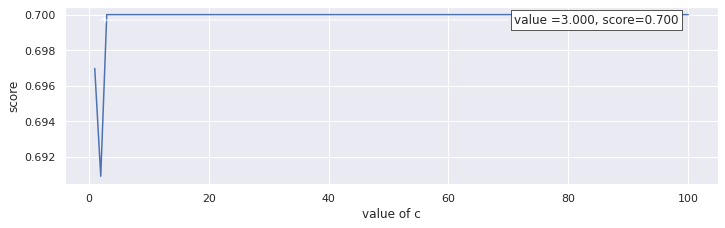

In [ ]:
plotting_graphs('value of c','score',v,a,0.6)

*support vector machine kernel: rbf*

In [ ]:
from sklearn import metrics
a=[]
accu=0
v=[]
maxi=0
for i in m_range:
  # svclassifier = make_pipeline(StandardScaler(), SVC(kernel='poly',C=i))
  svclassifier = SVC(kernel = 'rbf', C=i)
  svclassifier.fit(train_x, train_y)
  accu=svclassifier.score(test_x,test_y)
  a.append(accu)
  v.append(i)
  if(accu>maxi):
    f_c=i
    maxi=accu

accuracy['SVM: rbf']=maxi

In [ ]:
accuracy['SVM: rbf']*100

71.51515151515152

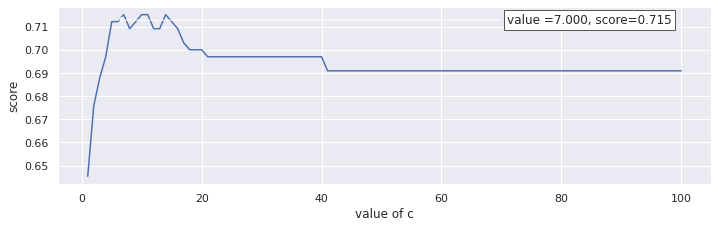

In [ ]:
plotting_graphs('value of c','score',v,a,0.6)

*support vector machine kernel: linear*

In [ ]:
from sklearn import metrics
a=[]
accu=0
v=[]
maxi=0
for i in m_range:
  # svclassifier = make_pipeline(StandardScaler(), SVC(kernel='poly',C=i))
  svclassifier = SVC(kernel = 'linear', C=i)
  svclassifier.fit(train_x, train_y)
  accu=svclassifier.score(test_x,test_y)
  a.append(accu)
  v.append(i)
  if(accu>maxi):
    f_c=i
    maxi=accu

accuracy['SVM: linear']=maxi

In [ ]:
accuracy['SVM: linear']*100

68.78787878787878

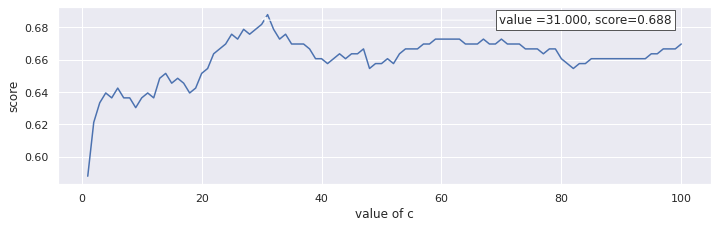

In [ ]:
plotting_graphs('value of c','score',v,a,0.6)

*KNeighborsClassifier*

In [ ]:
a=[]
accu=0
v=[]
maxi=0
for i in range(3,50):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(train_x, train_y)
  accu=knn.score(test_x, test_y)
  a.append(accu)
  v.append(i)
  if(accu>maxi):
    maxi=accu
    f_c=i

accuracy['KNeighbors']=maxi

In [ ]:
accuracy['KNeighbors']*100

66.06060606060606

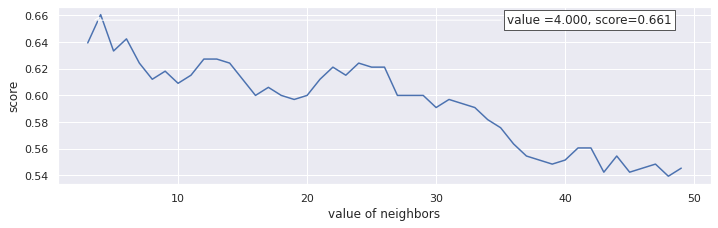

In [ ]:
plotting_graphs('value of neighbors','score',v,a,maxi+(maxi/6))

*comparing the accuracies of all the models and predicting who is yeilding the maximum*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


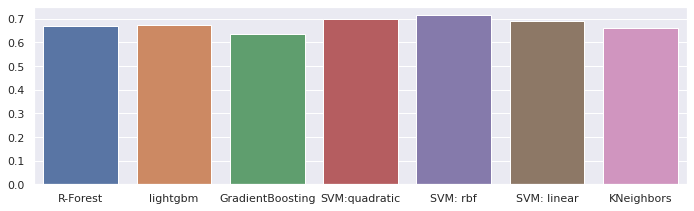

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,3.27)})
sns.barplot(list(accuracy.keys()), list(accuracy.values()))